In [295]:
import random
import seaborn as sns
import warnings #dont want to deal with warnings
warnings.filterwarnings('ignore')

# The Impossible Prisoners-Riddle

<img src="https://datascience.rhuleconlab.com/lectures/images/prisonersriddle.jpg">

Here is a riddle that seems impossible:

100 prisoners, numbered from 1 to 100 get the following deal:
- In a room are boxes numbered from 1 to 100.
- A guard takes 100 slips of paper containing the numbers from 1 to 100 and randomly put one slip in each box.
- The prisoners can enter the room one by one and open 50 boxes. Then they leave the room on the other side, so they cannot communicate with the prisoners who have yet to enter the room.
- The prisoners must leave the room exactly as they found it.
- If **all 100 prisoners** find the slip with their own number, all 100 prisoners go free. If one or more prisoners fail to find the slip with the own number, all 100 prisoners are executed.
- The prisoners are allowed to agree on a strategy before the first prisoner enters the room.

If each prisoner opens 50 boxes randomly, they have a 1-in-2 or 50% chance of finding the slip with their own number. This means that the probability that all 100 prisoners find their own number is $0.5^{100} = 0.00000000000000000000000000000079$%.

However, by agreeing to a strategy beforehand, the prisoners can push their probability of success to over 30%.

If you want to know more about the riddle and its solution, watch [this](https://www.youtube.com/watch?v=iSNsgj1OCLA).

In [ ]:
# The code should output either loss or victory

# Conditions for a Victory:
## Everyone finds their number in less than 50 boxes_opened
## Method giving best odds, is loop strategy, where prisoner opens a box and follows the number in order
## Chance to win = 1 - chance to lose
## 1 - (1/50 + 1/51 + 1/52 ... + 1/100) = 1/3

# Conditions for a Loss:
## If ANY prisoner gets a loop which is longer than 50
## Chance of loss:
## 1/50 + 1/51 + 1/52 ... + 1/100 = 2/3

In [ ]:
# First feature that the program should have is randomly generating loops
# If a loop happens to be longer than 50, loss is guaranteed
# Each prisonner has a unique set of loops
# There will be 100 individual loops

In [326]:
# This function returns the volume of 'winners' per group of prisoners
def individual_game(prisoner_count):

  big_loop = random.sample(range(1, prisoner_count + 1), prisoner_count) #this will be the loop (string of boxes to be opened)

  prisonners_loops = {}
  for i in range(1, prisoner_count + 1):
      prisonners_loops[i] = big_loop[i - 1]  #random unique value to each box

  prisoners = list(range(1, prisoner_count + 1))
  max_steps = prisoner_count // 2
  loop_lengths = []  #store the total cycle length of each prisoner
  survival_chances = []

  list_losers = []
  list_winners = []

  for i in prisoners:
      next_box = i
      fail_loop = []

      while next_box not in fail_loop:
          fail_loop.append(next_box)
          next_box = prisonners_loops[next_box]

      loop_length = len(fail_loop)  #the total length of the cycle
      loop_lengths.append(loop_length)

      #probability of survival = 1 / loop length
      survival_chances.append(1 / loop_length)

      if loop_length > max_steps:
          #print(f"Prisoner {i} failed. Cycle length: {loop_length}. Path: {fail_loop}")
          list_losers.append(i)
      else:
          #print(f"Prisoner {i} survived. Cycle length: {loop_length}. Path: {fail_loop}")
          list_winners.append(i)


  return len(list_winners)
  #print(len(list_winners), "people found")

  #sns.histplot(loop_lengths, bins=range(1, 101), kde=False)




In [328]:
def loop_histogram(repetitions, prisoner_count): #visualising the loop strategy
  survivor_counter = []
  for i in range(repetitions):
    survivor_counter.append(individual_game(prisoner_count))

  return sns.histplot(survivor_counter, bins = range(1, prisoner_count + 1))

<Axes: ylabel='Count'>

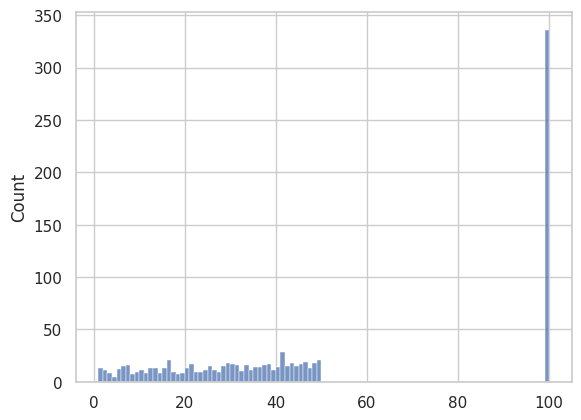

In [329]:
loop_histogram(1000, 100)

In [ ]:
def individual_game_random(prisoner_count):
  win = 0 #counter that builds up for every prisoner
  fail_loop = []
  list_winners = []
  list_losers = []

  if prisoner_count:

    #big_loop = random.sample(range(1, prisoner_count + 1), prisoner_count) #this will be the loop (string of boxes to be opened)
    #prisonners_loops = {}

    #for i in range(1, prisoner_count + 1):
    #    prisonners_loops[i] = big_loop[i-1] # Assigning a random unique value to 100 boxes per prisoner

    ############


    #prisoners = list(range(1, prisoner_count + 1)) #range of prisoners
    #everyone_survived = True #toggle to check if anyone fails
    max_steps = prisoner_count//2 #the total boxes that can be opened will be half of total prisoners

    for i in range(1,prisoner_count+1):
      #counter_fails = 0
      choices = random.sample(range(1, prisoner_count + 1), max_steps) #if all prisoners chose a random value
      #while counter_fails < max_steps:
      if i in choices:
        #counter_fails += 1
        list_winners.append(i)
        #break
      else:
        list_losers.append(i)


# The conditions for the 'final' output

    return len(list_winners)
#    loss = loss + 1
#    return loss


In [330]:
def random_histogram(repetitions, prisoner_count): #visualising the no strategy
  survivor_counter = []
  for i in range(repetitions):
    survivor_counter.append(individual_game_random(prisoner_count))

  return sns.histplot(survivor_counter, bins = range(1, prisoner_count + 1))

<Axes: ylabel='Count'>

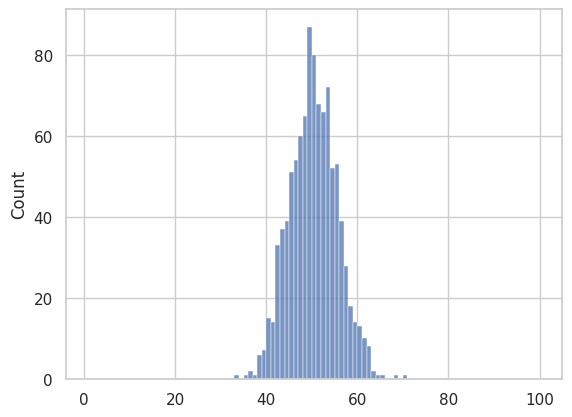

In [331]:
random_histogram(1000, 100)

In [335]:
def game(prisoner_count, all=False):
  win = 0 #counter that builds up for every prisoner
  loss = 0 #the moment this becomes 1, loss
  total_win = 0 #if all prisoners find their box, this will go up by 1
  fail_loop = []


  if prisoner_count:

    big_loop = random.sample(range(1, prisoner_count + 1), prisoner_count) #this will be the loop (string of boxes to be opened)
    prisonners_loops = {}

    for i in range(1, prisoner_count + 1):
        prisonners_loops[i] = big_loop[i-1] # Assigning a random unique value to 100 boxes per prisoner

    ############

    prisoners = list(range(1, prisoner_count + 1)) #range of prisoners
    everyone_survived = True #toggle to check if anyone fails
    max_steps = prisoner_count//2 #the total boxes that can be opened will be half of total prisoners


    for i in prisoners:
      counter_fails = 0 #this counter needs to reset for every prisoner, otherwise it gives invalid for everyone past the 1st guy
      next_box = i

      while counter_fails < max_steps:
        value_in_box = prisonners_loops[next_box] #this part causes the value of an index, to become the next index to be visited
        counter_fails += 1
        fail_loop.append(next_box)

    # Condition for winning
        if value_in_box == i:
          win += 1 #increase counter for win, later use it to determine if 'everyone' found their box
          list_winners.append(i)
          break #stop adding to the loop lenght once they find their unique number
        else:
          next_box = value_in_box
    # Condition for losing
      else:
        list_losers.append(i)
        everyone_survived = False
        if all:
          if win > 0:
            print("This is how many people found their boxes before failure:", win)
          print("This is how many people didn't find their boxes", prisoner_count - win)
        break #if one prisoner fails, stop


# The conditions for the 'final' output
    if win == prisoner_count:
      total_win += 1
      return 1
    else:
      loss += 1
      return 0
#    loss = loss + 1
#    return loss




In [341]:
def loop_probability(repetitions, prisoner_count):
  survivor_counter = 0
  for i in range(repetitions):
    survivor_counter += game(prisoner_count)

  print(survivor_counter/repetitions)



In [342]:
loop_probability(1000, 100)

0.317


In [ ]:
def game_random(prisoner_count, all=False):
  win = 0 #counter that builds up for every prisoner
  fail_loop = []

  if prisoner_count:

    #big_loop = random.sample(range(1, prisoner_count + 1), prisoner_count) #this will be the loop (string of boxes to be opened)
    #prisonners_loops = {}

    #for i in range(1, prisoner_count + 1):
    #    prisonners_loops[i] = big_loop[i-1] # Assigning a random unique value to 100 boxes per prisoner

    ############


    #prisoners = list(range(1, prisoner_count + 1)) #range of prisoners
    #everyone_survived = True #toggle to check if anyone fails
    max_steps = prisoner_count//2 #the total boxes that can be opened will be half of total prisoners

    for i in range(1,prisoner_count+1):
      #counter_fails = 0
      choices = random.sample(range(1, prisoner_count + 1), max_steps) #if all prisoners chose a random value
      #while counter_fails < max_steps:
      if i in choices:
        #counter_fails += 1
        win += 1
        #break


# The conditions for the 'final' output

    if win == prisoner_count:
      return 1
    else:
      return 0
#    loss = loss + 1
#    return loss


In [343]:
def random_probability(repetitions, prisoner_count):
  survivor_counter = 0
  for i in range(repetitions):
      survivor_counter += game_random(prisoner_count)

  print(survivor_counter / repetitions)


In [344]:
random_probability(1000, 100)

0.0


# Task 0

To simulate the room with the slips of numbers, create a dictionary with keys from 1 to 100 and randomly assign the numbers from 1 to 100 to their values.

# Task 1

Simulate the 100 prisoners randomly opening 50 boxes. The simulation should end once a prisoner has failed to find their own number. For each prisoner, print the number of boxes they opened and in the end, print which prisoners failed to find their number. No box should be opened more than once.

Run the simulation a few times, how many prisoners found their number of your best run?

# Task 2

Now, instead of opening 50 boxes at random, make each prisoner open the box with their own number and look at the slip. If the slip is not their own number, go to the box with that number on it. Do so until they found their own number of until they exhausted all their 50 attempts.

Run a few simulations (*Remember to reshuffle the boxes before each run of the simulation, otherwise, each simulation is just an exact repetition of the previous one.*). Do the prisoners manage to free themselves?

# Task 3

Change both your simulations so that all 100 prisoners get to open their boxes. Print how many of the 100 found their number. What do you notice when you run them a few times?

You will notice that in the first simulation, the numbers fluctuate around 50. In the second simulation, the numbers are either below 50 or exactly 100.

# Task 3

Run both simulation 10000 times and save the number of prisoners who found their number in each run. Then calculate the average success rate per prisoner. Next, create a histograms of the successes per run for both simulations. What do you notice?

In [ ]:
print(f"The average success rate in simulation 1 (random picks) is {}.")

SyntaxError: f-string: empty expression not allowed (<ipython-input-2-5503d108a9e0>, line 1)

In [ ]:
print(f"The average success rate in simulation 2 (follow numbers) is {}.")

The individual success probabilty remains 50% with both strategies, but the joint success probability is vastky different because with the second strategy, the outcomes are **not independent** any more as the histogram clearly shows. Either all prisoners are successful at the same time or fewer than 50% will find their number (watch the youtube video for a more comprehensive explanation).